In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import pickle

In [12]:
df = pd.read_csv('framingham.csv')
df_copy = df.copy()

In [13]:
df.sample(7)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2972,0,51,1.0,1,15.0,0.0,0,0,0,352.0,136.5,87.0,25.79,73.0,67.0,0
571,1,50,1.0,0,0.0,0.0,0,1,0,230.0,133.0,91.0,25.74,72.0,70.0,0
3397,1,49,1.0,1,20.0,0.0,0,1,0,270.0,160.5,106.5,30.33,75.0,65.0,0
77,0,44,3.0,1,20.0,NaN,0,0,0,213.0,115.0,72.5,21.16,80.0,89.0,0
2489,1,44,4.0,0,0.0,0.0,0,0,0,201.0,120.0,81.0,26.49,70.0,78.0,0
2280,0,54,2.0,0,0.0,0.0,0,0,0,243.0,138.0,79.0,21.93,75.0,95.0,0
347,1,41,1.0,1,20.0,0.0,0,0,0,238.0,128.0,86.0,26.09,80.0,72.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
print('Column wise Null values: ')
df.isnull().sum()

Column wise Null values: 


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

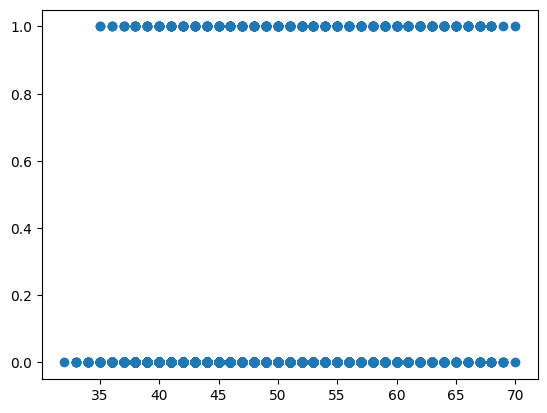

In [17]:
plt.scatter(df['age'], df['TenYearCHD'])

In [18]:
imputer_mean = SimpleImputer()
imputer_mode = SimpleImputer(strategy='most_frequent')
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if col in ['cigsPerDay', 'BPMeds', 'education']:
            df[col] = imputer_mode.fit_transform(df[[col]])
        df[col] = imputer_mean.fit_transform(df[[col]])


In [19]:
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)

In [20]:
df['BPMeds'] = df['BPMeds'].astype(int)
df['education'] = df['education'].astype(int)
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['sysBP'] = df['sysBP'].astype(int)
df['diaBP'] = df['diaBP'].astype(int)

In [21]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
logistic_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier(random_state=42)
logistic_model
models = {'logistic regression':logistic_model, 'xgboost classifier':xgb_model, 'catboost classifier':catboost_model}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    F1_score = f1_score(y_test, pred)
    print(f'accuracy for {name}: ', accuracy)
    print(f'F1_score for {name}: ', F1_score)

c:\Users\Ocyeanic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy for logistic regression:  0.8549528301886793
F1_score for logistic regression:  0.07518796992481203
accuracy for xgboost classifier:  0.8207547169811321
F1_score for xgboost classifier:  0.1827956989247312
Learning rate set to 0.017351
0:	learn: 0.6820907	total: 165ms	remaining: 2m 44s
1:	learn: 0.6697092	total: 169ms	remaining: 1m 24s
2:	learn: 0.6578484	total: 174ms	remaining: 57.7s
3:	learn: 0.6464348	total: 178ms	remaining: 44.3s
4:	learn: 0.6353817	total: 182ms	remaining: 36.3s
5:	learn: 0.6250370	total: 187ms	remaining: 31s
6:	learn: 0.6154588	total: 191ms	remaining: 27.1s
7:	learn: 0.6067336	total: 195ms	remaining: 24.2s
8:	learn: 0.5972346	total: 199ms	remaining: 22s
9:	learn: 0.5887474	total: 204ms	remaining: 20.2s
10:	learn: 0.5804584	total: 208ms	remaining: 18.7s
11:	learn: 0.5737189	total: 212ms	remaining: 17.4s
12:	learn: 0.5660679	total: 215ms	remaining: 16.4s
13:	learn: 0.5592706	total: 220ms	remaining: 15.5s
14:	learn: 0.5519454	total: 225ms	remaining: 14.8s
15

In [35]:
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

In [41]:
input = pd.DataFrame([{
  "male": 0,
  "age": 80,
  "education": 1,
  "currentSmoker": 1,
  "cigsPerDay": 40,
  "BPMeds": 0,
  "prevalentStroke": 0,
  "prevalentHyp": 1,
  "diabetes": 0,
  "totChol": 246,
  "sysBP": 128,
  "diaBP": 69,
  "BMI": 31,
  "heartRate": 198,
  "glucose": 500
}])

In [42]:
predictions = logistic_model.predict(input)

In [43]:
predictions

array([0])